Lalit More - Batch 6

Task 1.1


In [2]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

nltk.download('movie_reviews')
documents = []

for fileid in movie_reviews.fileids():
    review = movie_reviews.raw(fileid)
    category = movie_reviews.categories(fileid)[0]
    documents.append((review, category))
texts = []
labels = []

for review, category in documents:
    texts.append(review)
    labels.append(category)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
model = MultinomialNB()
model.fit(X, labels)
test_review = ["This movie was fantastic and very interesting"]
test_vector = vectorizer.transform(test_review)

prediction = model.predict(test_vector)

print("Prediction:", prediction)


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Prediction: ['pos']


 Task 1.2

In [ ]:
def analyze_text(paragraph):
    sentences = paragraph.split(".")
    sentences = [s.strip() for s in sentences if s.strip() != ""]
    tokens = paragraph.split()
    paragraphs = paragraph.split("\n\n")
    print("List of Sentences:")
    print(sentences)
    
    print("\nList of Tokens:")
    print(tokens)
    
    print("\nNumber of Sentences:", len(sentences))
    print("Number of Tokens:", len(tokens))
    print("Number of Paragraphs:", len(paragraphs))
text = """Natural Language Processing is very interesting.
It helps computers understand human language.

It is widely used in chatbots and sentiment analysis."""

analyze_text(text)


List of Sentences:
['Natural Language Processing is very interesting', 'It helps computers understand human language', 'It is widely used in chatbots and sentiment analysis']

List of Tokens:
['Natural', 'Language', 'Processing', 'is', 'very', 'interesting.', 'It', 'helps', 'computers', 'understand', 'human', 'language.', 'It', 'is', 'widely', 'used', 'in', 'chatbots', 'and', 'sentiment', 'analysis.']

Number of Sentences: 3
Number of Tokens: 21
Number of Paragraphs: 2


Task 1.3


In [ ]:
# a) Tokenization
import spacy
text = "Natural Language Processing is very interesting!"
basic_tokens = text.split()
print("Basic Split Tokens:")
print(basic_tokens)
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

spacy_tokens = [token.text for token in doc]

print("\nspaCy Tokens:")
print(spacy_tokens)


Basic Split Tokens:
['Natural', 'Language', 'Processing', 'is', 'very', 'interesting!']

spaCy Tokens:
['Natural', 'Language', 'Processing', 'is', 'very', 'interesting', '!']


In [9]:
# b) Stopwords Removal

doc = nlp("This is a simple example to show stopword removal")

filtered_words = []

for token in doc:
    if not token.is_stop:
        filtered_words.append(token.text)

print("\nAfter Removing Stopwords:")
print(filtered_words)



After Removing Stopwords:
['simple', 'example', 'stopword', 'removal']


In [10]:
# c) Lemmatization and Stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

word = "studies"

stem_word = stemmer.stem(word)

doc = nlp(word)
lemma_word = doc[0].lemma_

print("\nOriginal Word:", word)
print("After Stemming:", stem_word)
print("After Lemmatization:", lemma_word)



Original Word: studies
After Stemming: studi
After Lemmatization: study


In [ ]:
# d) Cleaning text

import re
import emoji

text = "Hello!!! 😊 #NLP @user123 This is awesome!!!"
text = emoji.replace_emoji(text, replace='')
text = re.sub(r'[@#]\w+', '', text)
text = re.sub(r'[^\w\s]', '', text)

print("\nCleaned Text:")
print(text)



Cleaned Text:
Hello    This is awesome


In [12]:
# e) Lowercasing and Normalization

text = "   NLP   Is   VERY   Powerful   "

text = text.lower()
text = " ".join(text.split())

print("\nNormalized Text:")
print(text)



Normalized Text:
nlp is very powerful


In [ ]:
# f) Regex operations

text = "Contact us at test@gmail.com or info@yahoo.com 123   456"
emails = re.findall(r'\S+@\S+', text)
print("\nExtracted Emails:")
print(emails)

text_no_numbers = re.sub(r'\d+', '', text)
print("\nWithout Numbers:")
print(text_no_numbers)
text_single_space = re.sub(r'\s+', ' ', text)
print("\nSingle Space Text:")
print(text_single_space)



Extracted Emails:
['test@gmail.com', 'info@yahoo.com']

Without Numbers:
Contact us at test@gmail.com or info@yahoo.com    

Single Space Text:
Contact us at test@gmail.com or info@yahoo.com 123 456


Task 1.4

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
sentences = [
    "I love natural language processing",
    "Natural language processing is fun",
    "I love coding in python"
]
bow = CountVectorizer()

bow_matrix = bow.fit_transform(sentences)

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow.get_feature_names_out())

print("Bag of Words Matrix:")
print(bow_df)

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

print("\nTF-IDF Matrix:")
print(tfidf_df)

print("\nBoW Word Counts (First Sentence):")
print(bow_df.iloc[0])

print("\nTF-IDF Scores (First Sentence):")
print(tfidf_df.iloc[0])


Bag of Words Matrix:
   coding  fun  in  is  language  love  natural  processing  python
0       0    0   0   0         1     1        1           1       0
1       0    1   0   1         1     0        1           1       0
2       1    0   1   0         0     1        0           0       1

TF-IDF Matrix:
     coding      fun        in       is  language     love   natural  \
0  0.000000  0.00000  0.000000  0.00000  0.500000  0.50000  0.500000   
1  0.000000  0.51742  0.000000  0.51742  0.393511  0.00000  0.393511   
2  0.528635  0.00000  0.528635  0.00000  0.000000  0.40204  0.000000   

   processing    python  
0    0.500000  0.000000  
1    0.393511  0.000000  
2    0.000000  0.528635  

BoW Word Counts (First Sentence):
coding        0
fun           0
in            0
is            0
language      1
love          1
natural       1
processing    1
python        0
Name: 0, dtype: int64

TF-IDF Scores (First Sentence):
coding        0.0
fun           0.0
in            0.0
is        

Task 1.5

In [ ]:
import re
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
text = """
Natural language processing (NLP) is a subfield of linguistics, computer science,
and artificial intelligence concerned with the interactions between computers
and human language. NLP is used in chatbots, machine translation, and sentiment analysis.
"""
text = text.lower()

text = re.sub(r'[^\w\s]', '', text)
tokens = text.split()
trigrams = list(ngrams(tokens, 3))
trigram_freq = Counter(trigrams)

top5 = trigram_freq.most_common(5)

print("Top 5 Trigrams (With Stopwords):")
for trigram, freq in top5:
    print(trigram, "->", freq)
filtered_tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]

filtered_trigrams = list(ngrams(filtered_tokens, 3))

filtered_freq = Counter(filtered_trigrams)

top5_filtered = filtered_freq.most_common(5)

print("\nTop 5 Trigrams (Without Stopwords):")
for trigram, freq in top5_filtered:
    print(trigram, "->", freq)
def bigram_probability(word1, word2, tokens):
    bigrams = list(ngrams(tokens, 2))
    
    bigram_count = Counter(bigrams)
    unigram_count = Counter(tokens)
    
    if unigram_count[word1] == 0:
        return 0
    
    probability = bigram_count[(word1, word2)] / unigram_count[word1]
    
    return probability

prob = bigram_probability("natural", "language", tokens)

print("\nBigram Probability P(language | natural) =", prob)



Top 5 Trigrams (With Stopwords):
('natural', 'language', 'processing') -> 1
('language', 'processing', 'nlp') -> 1
('processing', 'nlp', 'is') -> 1
('nlp', 'is', 'a') -> 1
('is', 'a', 'subfield') -> 1

Top 5 Trigrams (Without Stopwords):
('natural', 'language', 'processing') -> 1
('language', 'processing', 'nlp') -> 1
('processing', 'nlp', 'subfield') -> 1
('nlp', 'subfield', 'linguistics') -> 1
('subfield', 'linguistics', 'computer') -> 1

Bigram Probability P(language | natural) = 1.0


Task 1.6

In [ ]:
import math
from collections import Counter

def text_to_vector(text):
    words = text.lower().split()
    return Counter(words)
def cosine_similarity(text1, text2):
    
    vec1 = text_to_vector(text1)
    vec2 = text_to_vector(text2)
    common_words = set(vec1.keys()) & set(vec2.keys())
    dot_product = sum(vec1[word] * vec2[word] for word in common_words)
    magnitude1 = math.sqrt(sum(val**2 for val in vec1.values()))
    magnitude2 = math.sqrt(sum(val**2 for val in vec2.values()))
    
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    
    return dot_product / (magnitude1 * magnitude2)

text1 = "I love natural language processing"
text2 = "I love coding in python"

print("Cosine Similarity:", cosine_similarity(text1, text2))


Cosine Similarity: 0.3999999999999999


In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def jaccard_similarity(text1, text2):
    
    set1 = set(text1.lower().split())
    set2 = set(text2.lower().split())
    
    intersection = set1 & set2
    union = set1 | set2
    
    return len(intersection) / len(union)
def remove_stopwords(text):
    words = text.lower().split()
    filtered = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return " ".join(filtered)
tweet1 = "I love watching football on weekends"
tweet2 = "I love playing football every weekend"

print("Jaccard Before:", jaccard_similarity(tweet1, tweet2))

clean1 = remove_stopwords(tweet1)
clean2 = remove_stopwords(tweet2)

print("Jaccard After Removing Stopwords:", jaccard_similarity(clean1, clean2))


Jaccard Before: 0.3333333333333333
Jaccard After Removing Stopwords: 0.3333333333333333


In [20]:
faqs = [
    "How can I reset my password?",
    "How do I change my email address?",
    "What is the refund policy?",
    "How can I contact customer support?"
]
def find_most_similar(query, faq_list):
    
    best_score = 0
    best_question = ""
    
    for question in faq_list:
        score = cosine_similarity(query, question)
        
        if score > best_score:
            best_score = score
            best_question = question
    
    return best_question, best_score
user_query = "I forgot my password"

question, score = find_most_similar(user_query, faqs)

print("Most Similar Question:", question)
print("Similarity Score:", score)


Most Similar Question: How can I reset my password?
Similarity Score: 0.4082482904638631


Task 1.7

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

texts = [
    "I love this movie",
    "This film was amazing",
    "I really enjoyed the story",
    "This movie was terrible",
    "I hate this film",
    "The plot was boring",
    "Fantastic acting and great story",
    "Worst movie ever"
]

labels = [
    "positive",
    "positive",
    "positive",
    "negative",
    "negative",
    "negative",
    "positive",
    "negative"
]

X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.3, random_state=42
)
bow = CountVectorizer()
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)

pred_bow = model_bow.predict(X_test_bow)

accuracy_bow = accuracy_score(y_test, pred_bow)

print("Accuracy using BoW:", accuracy_bow)


tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

pred_tfidf = model_tfidf.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, pred_tfidf)

print("Accuracy using TF-IDF:", accuracy_tfidf)


tfidf_bigram = TfidfVectorizer(ngram_range=(1,2))  # unigrams + bigrams

X_train_bigram = tfidf_bigram.fit_transform(X_train)
X_test_bigram = tfidf_bigram.transform(X_test)

model_bigram = MultinomialNB()
model_bigram.fit(X_train_bigram, y_train)

pred_bigram = model_bigram.predict(X_test_bigram)

accuracy_bigram = accuracy_score(y_test, pred_bigram)

print("Accuracy using TF-IDF + Bigrams:", accuracy_bigram)


Accuracy using BoW: 0.3333333333333333
Accuracy using TF-IDF: 0.3333333333333333
Accuracy using TF-IDF + Bigrams: 0.3333333333333333


Task 1.8


In [22]:
import spacy
from collections import Counter
import random

nlp = spacy.load("en_core_web_sm")
text = """
Natural language processing is a powerful technology.
It helps computers understand human language.
"""

doc = nlp(text)

pos_counts = Counter()

for token in doc:
    pos_counts[token.pos_] += 1

print("POS Tag Frequencies:")
for pos, count in pos_counts.items():
    print(pos, ":", count)


POS Tag Frequencies:
SPACE : 3
ADJ : 3
NOUN : 5
AUX : 1
DET : 1
PUNCT : 2
PRON : 1
VERB : 2


In [23]:
review = """
This phone has an amazing camera and beautiful design.
The battery life is terrible but the screen is bright and clear.
"""

doc = nlp(review)

adjectives = []

for token in doc:
    if token.pos_ == "ADJ":
        adjectives.append(token.text)

print("Adjectives describing product:")
print(adjectives)


Adjectives describing product:
['amazing', 'beautiful', 'terrible', 'bright', 'clear']


In [25]:
text = """
Cats chase mice. Dogs eat food. Students read books.
Teachers explain lessons. Birds build nests.
"""

doc = nlp(text)

nouns = []
verbs = []

for token in doc:
    if token.pos_ == "NOUN":
        nouns.append(token.text)
    if token.pos_ == "VERB":
        verbs.append(token.text)
def generate_sentence():
    noun1 = random.choice(nouns)
    verb = random.choice(verbs)
    noun2 = random.choice(nouns)
    
    return noun1 + " " + verb + " " + noun2

print("Generated Sentence:")
print(generate_sentence())


Generated Sentence:
Cats chase food


Task 1.9

Extracted Dates:
January 15, 2023
February 20, 2023
March 2023
April 10, 2024

Organization Frequencies:
Counter({'Apple': 1, 'Microsoft': 1, 'Google': 1, 'Amazon': 1})


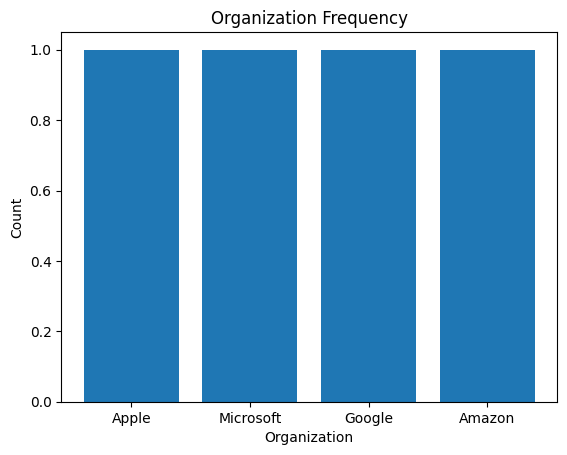

Original:
Elon Musk met Sundar Pichai in New York.

Anonymized:
Elon Musk met <PERSON> in New York.


In [28]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")
text = """
On January 15, 2023, Apple announced a new product in California.
Microsoft responded on February 20, 2023.
Google joined the competition in March 2023.
On April 10, 2024, Amazon launched a similar service.
"""
doc = nlp(text)

dates = []

for ent in doc.ents:
    if ent.label_ == "DATE":
        dates.append(ent.text)

print("Extracted Dates:")
for d in dates:
    print(d)
organizations = []

for ent in doc.ents:
    if ent.label_ == "ORG":
        organizations.append(ent.text)

org_counts = Counter(organizations)

print("\nOrganization Frequencies:")
print(org_counts)
names = list(org_counts.keys())
values = list(org_counts.values())

plt.bar(names, values)
plt.title("Organization Frequency")
plt.xlabel("Organization")
plt.ylabel("Count")
plt.show()

def anonymize_person(text):
    doc = nlp(text)
    new_text = text
    
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            new_text = new_text.replace(ent.text, "<PERSON>")
    
    return new_text
sample_text = "Elon Musk met Sundar Pichai in New York."

print("Original:")
print(sample_text)

print("\nAnonymized:")
print(anonymize_person(sample_text))


Task 1.10

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

documents = data.data[:1000]   
vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english'
)
X = vectorizer.fit_transform(documents)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic {topic_idx + 1}:")
    top_words = topic.argsort()[-10:]
    for i in top_words:
        print(feature_names[i], end=" ")



Topic 1:
card p2 think thanks bit use problem just like good 
Topic 2:
armenian think does don like god know said jesus people 
Topic 3:
team 10 use 1993 20 tobacco 00 space year health 
Topic 4:
wm fallacy 3t 0d ql 04 1t 145 max ax 
Topic 5:
power use think period windows like just time don know 

In [31]:
import pyLDAvis
import numpy as np

pyLDAvis.enable_notebook()

panel = pyLDAvis.prepare(
    topic_term_dists=lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis],
    doc_topic_dists=lda.transform(X),
    doc_lengths=X.sum(axis=1).A1,
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=X.sum(axis=0).A1
)

panel


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.108160 -0.105897       1        1  40.555871
4     -0.111497 -0.041649       2        1  17.254490
0     -0.085309 -0.035365       3        1  15.611454
2     -0.073483  0.195465       4        1  15.058821
3      0.378450 -0.012554       5        1  11.519365, topic_info=            Term         Freq        Total Category  logprob  loglift
1160          ax  4275.000000  4275.000000  Default  30.0000  30.0000
4594         max   313.000000   313.000000  Default  29.0000  29.0000
88           145    96.000000    96.000000  Default  28.0000  28.0000
5324      people   357.000000   357.000000  Default  27.0000  27.0000
197           1t    59.000000    59.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
313           34    21.867184    38.008434   Topic5  -6.0742   1.6083
1952  conclusion    23.874368    47.148205   Topic5  -5.9864   1.4807
7493       valid    17.513342    22.705798   Topic5  -6.2962   1.9015
983     argument    23.487207    95.047467   Topic5  -6.0027   0.7632
5201          p2    19.663720    68.939071   Topic5  -6.1804   0.9067

[348 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.010051     00
0         2  0.321618     00
0         3  0.130657     00
0         4  0.542730     00
6         2  0.029057     04
...     ...       ...    ...
7857      4  0.520410   year
7858      1  0.540741  years
7858      2  0.080708  years
7858      3  0.080708  years
7858      4  0.298618  years

[620 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 3, 4])

In [ ]:

nmf = NMF(n_components=5, random_state=42)
nmf.fit(X)

print("LDA Perplexity:", lda.perplexity(X))
print("NMF Reconstruction Error:", nmf.reconstruction_err_)


LDA Perplexity: 2635.677054123062
NMF Reconstruction Error: 410.9563092722755


Task 1.11

Loading GloVe file...
Loaded words: 400000

Words similar to 'doctor':
physician -> 0.7673
nurse -> 0.7522
dr. -> 0.7175
doctors -> 0.7081
patient -> 0.7074


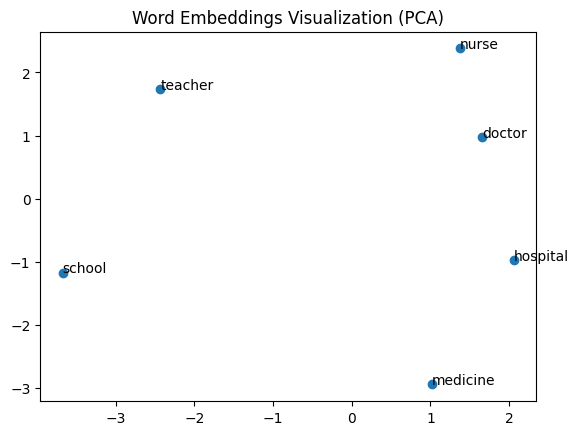


Analogy: king - man + woman
king -> 0.8552
queen -> 0.7834
monarch -> 0.6934
throne -> 0.6833
daughter -> 0.6809


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_glove(path):
    embeddings = {}
    
    with open(path, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype="float32")
            embeddings[word] = vector
            
    return embeddings
print("Loading GloVe file...")
embeddings = load_glove("glove.6B.100d.txt")
print("Loaded words:", len(embeddings))

def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def most_similar(word, embeddings, top_n=5):
    word_vector = embeddings[word]
    similarities = {}

    for other_word in embeddings:
        if other_word != word:
            sim = cosine_similarity(word_vector, embeddings[other_word])
            similarities[other_word] = sim

    sorted_words = sorted(similarities.items(),
                          key=lambda x: x[1],
                          reverse=True)

    return sorted_words[:top_n]


print("\nWords similar to 'doctor':")
similar_words = most_similar("doctor", embeddings)

for word, score in similar_words:
    print(word, "->", round(score, 4))

words = ["doctor", "nurse", "hospital",
         "medicine", "teacher", "school"]

vectors = [embeddings[w] for w in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (result[i, 0], result[i, 1]))

plt.title("Word Embeddings Visualization (PCA)")
plt.show()


def analogy(word1, word2, word3, embeddings):
    
    result_vector = embeddings[word1] - embeddings[word2] + embeddings[word3]
    
    similarities = {}

    for word in embeddings:
        sim = cosine_similarity(result_vector, embeddings[word])
        similarities[word] = sim

    sorted_words = sorted(similarities.items(),
                          key=lambda x: x[1],
                          reverse=True)

    return sorted_words[:5]


print("\nAnalogy: king - man + woman")
analogy_result = analogy("king", "man", "woman", embeddings)

for word, score in analogy_result:
    print(word, "->", round(score, 4))
